In [64]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
from scipy.interpolate import griddata, RBFInterpolator, InterpolatedUnivariateSpline, LinearNDInterpolator

In [3]:
def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

In [5]:
grid_x, grid_y = np.meshgrid(np.linspace(0, 1, 100),
                             np.linspace(0, 1, 200), indexing='ij')

In [6]:
rng = np.random.default_rng()
points = rng.random((1000, 2))
values = func(points[:,0], points[:,1])

In [8]:
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')

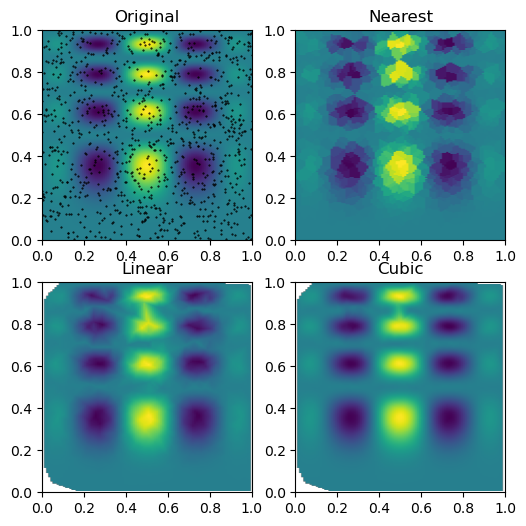

In [9]:
plt.subplot(221)
plt.imshow(func(grid_x, grid_y).T, extent=(0, 1, 0, 1), origin='lower')
plt.plot(points[:, 0], points[:, 1], 'k.', ms=1)   # data
plt.title('Original')
plt.subplot(222)
plt.imshow(grid_z0.T, extent=(0, 1, 0, 1), origin='lower')
plt.title('Nearest')
plt.subplot(223)
plt.imshow(grid_z1.T, extent=(0, 1, 0, 1), origin='lower')
plt.title('Linear')
plt.subplot(224)
plt.imshow(grid_z2.T, extent=(0, 1, 0, 1), origin='lower')
plt.title('Cubic')
plt.gcf().set_size_inches(6, 6)
plt.show()


# RBF case, 2D

In [33]:
rng = np.random.default_rng()

xy = rng.random((100, 2))*4.0-2.0
z = xy[:, 0]*np.exp(-xy[:, 0]**2-xy[:, 1]**2)

edges = np.linspace(-2.0, 2.0, 101)
centers = edges[:-1] + np.diff(edges[:2])[0] / 2.

x_i, y_i = np.meshgrid(centers, centers)
x_i = x_i.reshape(-1, 1)
y_i = y_i.reshape(-1, 1)
xy_i = np.concatenate([x_i, y_i], axis=1)


In [36]:
# use RBF
rbf = RBFInterpolator(xy, z, epsilon=1)
z_i = rbf(xy_i)

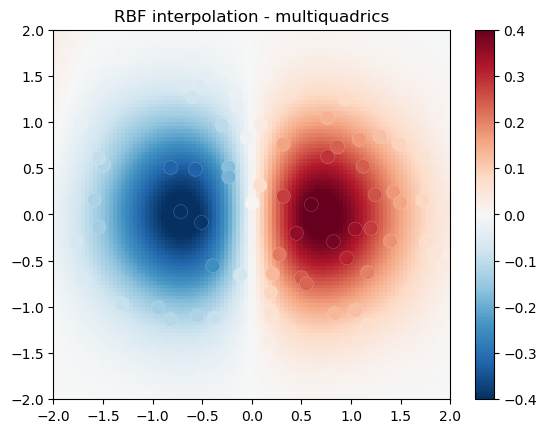

In [37]:
# plot the result
fig, ax = plt.subplots()
X_edges, Y_edges = np.meshgrid(edges, edges)
lims = dict(cmap='RdBu_r', vmin=-0.4, vmax=0.4)
mapping = ax.pcolormesh(
    X_edges, Y_edges, z_i.reshape(100, 100),
    shading='flat', **lims
)
ax.scatter(xy[:, 0], xy[:, 1], 100, z, edgecolor='w', lw=0.1, **lims)
ax.set(
    title='RBF interpolation - multiquadrics',
    xlim=(-2, 2),
    ylim=(-2, 2),
)
fig.colorbar(mapping)

## Generalised to N dimensions

(1000, 3) (1000,)
(51, 51, 51) (51, 51, 51) (51, 51, 51)


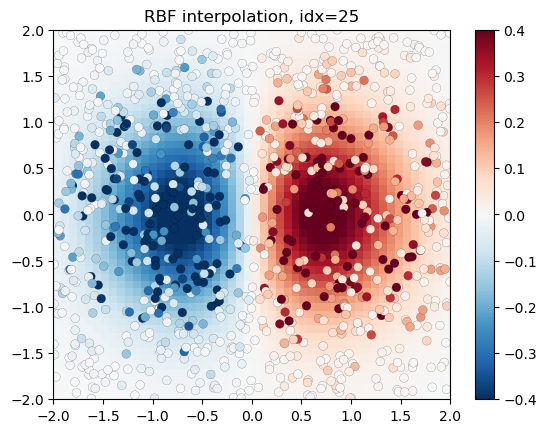

In [73]:
rng = np.random.default_rng()

# make data
nsamps = 1000
xyz = rng.random((nsamps, 3))*4.0-2.0
v = xyz[:, 0]*np.exp(-xyz[:, 0]**2 - xyz[:, 1]**2 + xyz[:, 2])
print(xyz.shape, v.shape)

# interpolate
rbf = RBFInterpolator(xyz, v, epsilon=1)

# new grid for evaluating RBF
meshsize = 50
edges = np.linspace(-2.0, 2.0, meshsize+1)
centers = edges[:-1] + np.diff(edges[:2])[0] / 2.

x_i, y_i, z_i = np.meshgrid(centers, centers, centers)
x_i = x_i.reshape(-1, 1)
y_i = y_i.reshape(-1, 1)
z_i = z_i.reshape(-1, 1)
xyz_i = np.concatenate([x_i, y_i, z_i], axis=1)

# apply interpolator
v_i = rbf(xyz_i)

# plot the result
fig, ax = plt.subplots()
X_edges, Y_edges, Z_edges = np.meshgrid(edges, edges, edges)
print(X_edges.shape, Y_edges.shape, Z_edges.shape)
lims = dict(cmap='RdBu_r', vmin=-0.4, vmax=0.4)

idx = 25

mapping = ax.pcolormesh(
    X_edges[:,:,idx], Y_edges[:,:,idx], v_i.reshape(meshsize, meshsize,meshsize)[:,:,idx],
    shading='flat', **lims
)


ax.scatter(xyz[:, 0], xyz[:, 1], 40, v, edgecolor='k', lw=0.1, **lims)
ax.set(
    title=f'RBF interpolation, idx={idx}',
    xlim=(-2, 2),
    ylim=(-2, 2),
)
fig.colorbar(mapping)

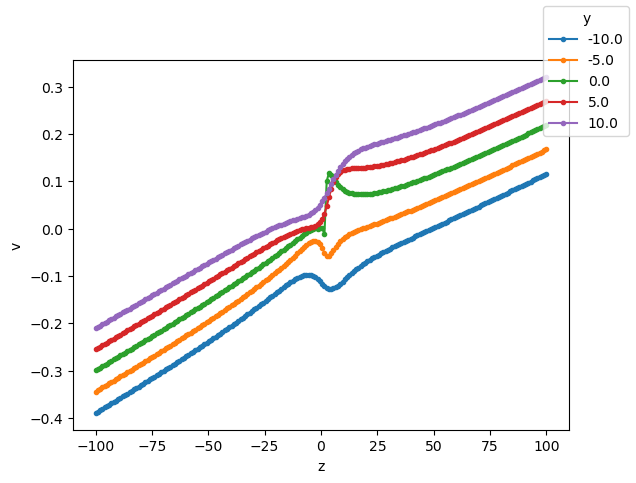

In [92]:
fig,ax=plt.subplots(1,1)

y_test = np.linspace(-10, 10, 5)
for y in y_test:
    z_test = np.linspace(-100, 100, 200)
    v_test = [rbf([[0,y,z]]) for z in z_test]
    ax.plot(z_test, v_test, marker='.', label=y)
fig.legend(title='y')
ax.set(xlabel='z', ylabel='v')
plt.show()

## Linear scattered ND interpolator, in 3D

In [141]:
# make samples
samples = 300_000
rng = np.random.default_rng()
x = rng.random(samples) - 0.5
y = rng.random(samples) * 4 * np.pi
z = rng.random(samples) - 0.5

# evaluate
v = np.hypot(x, z**2) + np.sin(y)/2 + 1

In [142]:
# grid to interpolate to
X = np.linspace(min(x), max(x))
Y = np.linspace(min(y), max(y))
Z = np.linspace(min(z), max(z))
X, Y, Z = np.meshgrid(X, Y, Z) # grid for interpolation

In [150]:
# interpolate
# xyz = list(zip(x, y, z))
xyz = np.array([x, y, z]).T
print(np.shape(xyz))
interp = LinearNDInterpolator(xyz, v)

(300000, 3)


In [144]:
# evaluate
V = interp(X, Y, Z)

0.5105003877892689 2.0317989956483435


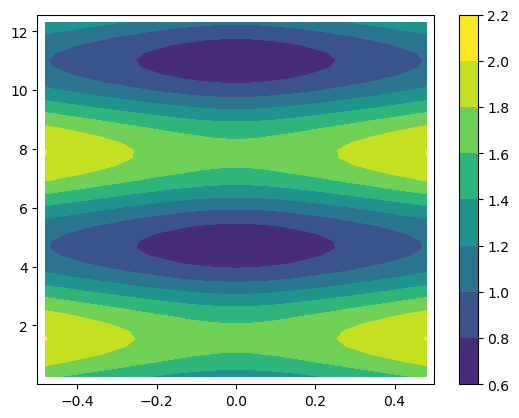

In [146]:
# plot at crosssection=idx
idx = 5

vmin=np.amin(V[np.isfinite(V)])
vmax=np.amax(V[np.isfinite(V)])
print(vmin, vmax)

fig,ax = plt.subplots(1,1)
sm = ax.contourf(X[:,:,idx], Y[:,:,idx], V[:,:,idx], cmap='viridis', vmin=vmin, vmax=vmax)
# ax.scatter(x, y, c=v, s=10, ec='k', label="input point", cmap='viridis', linewidths=0.4)
fig.colorbar(sm)
plt.show()